In [1]:
import numpy as np
import scipy.stats as sps

In [2]:
bandits = []
bandits1 = sps.bernoulli(0.3)
bandits2 = sps.bernoulli(0.5)
bandits = [bandits1,bandits2]

In [3]:
for _ in range(10):
    print(bandits2.rvs())

0
1
1
0
1
1
0
0
1
0


In [24]:
def random_player(bandits,num_trials):
    rewards = []
    for _ in range(num_trials):
        b = np.random.randint(0,2)
        reward = bandits[b].rvs()
        rewards.append(bandits[b].mean())
    rew = np.asarray(rewards)
    print(rew)
    return np.sum(0.5-rew)

[0.3 0.3 0.3 0.5 0.5 0.3 0.5 0.5 0.5 0.5]
[0.5 0.3 0.3 0.5 0.3 0.5 0.5 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.3 0.3 0.3 0.5
 0.5 0.3 0.5 0.5 0.3 0.3 0.5 0.5 0.3 0.5 0.5 0.3 0.3 0.5 0.5 0.3 0.5 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.5 0.3 0.5 0.3 0.3
 0.3 0.5 0.5 0.3 0.5 0.3 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.5 0.5
 0.5 0.5 0.5 0.3 0.3 0.5 0.5 0.3 0.3 0.5 0.3 0.3 0.5 0.5 0.5 0.3 0.3 0.5
 0.5 0.3 0.3 0.3 0.3 0.5 0.5 0.3 0.3 0.3]
[0.3 0.3 0.3 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.3 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.3 0.3 0.3 0.5 0.3 0.3 0.3 0.5 0.5 0.5 0.5
 0.5 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.5
 0.5 0.3 0.3 0.3 0.5 0.5 0.5 0.3 0.3 0.3 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5
 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.3
 0.3 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.3 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5
 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.3 0.5 0.5 0.3 0.3
 0.3 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.3 0.5

[0.5 0.3 0.3 ... 0.3 0.3 0.5]


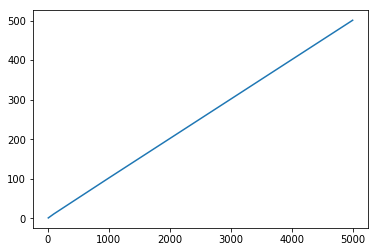

In [25]:
samples = [10,100,1000,5000]
regrets = []
for sample_num in samples:
    regrets.append(random_player(bandits,sample_num))
import matplotlib.pyplot as plt
plt.plot(samples,regrets)

In [28]:
def bayesian_player(bandits,num_trials):
    rewards = []
    betas =[]
    wins = [0.1,0.1]
    losses = [0.1,0.1]
    betas.append(sps.beta(0.1,0.1))
    betas.append(sps.beta(0.1,0.1))
    for _ in range(num_trials):
        b = np.argmax([betas[0].rvs(),betas[1].rvs()])
        # b = np.random.randint(0,2)
        reward = bandits[b].rvs()
        rewards.append(bandits[b].mean())
        wins[b]+=reward
        losses[b]+=1-reward
        betas[b] = sps.beta(wins[b],losses[b])
    rew = np.asarray(rewards)
    print(rew)
    return np.sum(0.5-rew)

[0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5]
[0.3 0.3 0.5 0.5 0.5 0.3 0.3 0.3 0.3 0.5 0.5 0.3 0.5 0.3 0.3 0.3 0.5 0.3
 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3]
[0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.5 0.5 0.5 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]

[0.3 0.3 0.5 0.3 0.5 0.5 0.5 0.3 0.3 0.5 0.3 0.5 0.5 0.3 0.3 0.3 0.3 0.3
 0.3 0.5 0.5 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.3 0.3
 0.3 0.5 0.3 0.5 0.3 0.3 0.3 0.5 0.5 0.3 0.5 0.3 0.5 0.5 0.5 0.5 0.3 0.3
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.5 0.5 0.3 0.5 0.3 0.5 0.5 0.5 0.3 0.5 0.3
 0.5 0.5 0.3 0.3 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.5
 0.5 0.5 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.5
 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.3 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.3 0.5 0.5 0.5
 0.5 0.3 0.5 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

[0.3 0.3 0.5 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.3 0.5 0.3 0.3 0.5 0.3 0.3 0.5
 0.3 0.3 0.3 0.3 0.5 0.3 0.5 0.5 0.3 0.3 0.5 0.3 0.5 0.3 0.3 0.3 0.3 0.5
 0.3 0.3 0.3 0.5 0.5 0.3 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.3 0.3
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.3 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


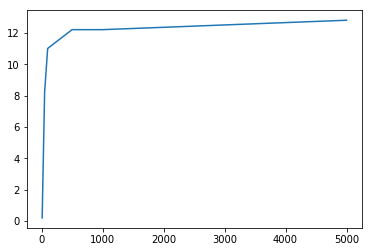

In [29]:
samples = [10,50,100,500,1000,5000]
regrets = []
for sample_num in samples:
    regrets.append(bayesian_player(bandits,sample_num))
import matplotlib.pyplot as plt
plt.plot(samples,regrets)